In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [3]:
!wget 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

--2025-10-06 13:12:41--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  2.66MB/s    in 0.3s    

2025-10-06 13:12:42 (2.66 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [5]:
data = pd.read_csv("car_fuel_efficiency.csv")

In [6]:
data

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [7]:
df = data[[
    'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'
    ]]

In [8]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


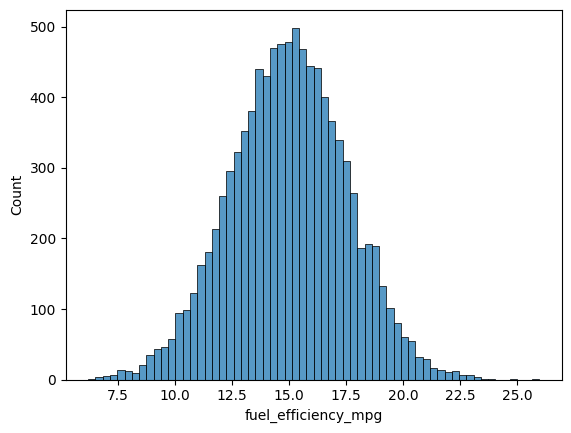

In [10]:
sns.histplot(df['fuel_efficiency_mpg'])
plt.show()

In [11]:
df['fuel_efficiency_mpg'].skew()

np.float64(-0.012062219273507922)

In [16]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [17]:
df['horsepower'].median()

np.float64(149.0)

In [29]:
train_val, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)
print(len(train), len(val), len(test))

5822 1941 1941


In [30]:
col = 'horsepower' 
print("Missing in train:", train[col].isna().sum())
print("Missing in val:", val[col].isna().sum())
print("Missing in test:", test[col].isna().sum())

Missing in train: 418
Missing in val: 136
Missing in test: 154


In [31]:

X_train_0 = train.copy()
X_val_0 = val.copy()
X_train_0[col] = X_train_0[col].fillna(0)
X_val_0[col] = X_val_0[col].fillna(0)
print("Missing in train after filling 0:", X_train_0[col].isna().sum())
print("Missing in val after filling 0:", X_val_0[col].isna().sum())


Missing in train after filling 0: 0
Missing in val after filling 0: 0


In [38]:
target = 'fuel_efficiency_mpg'
X_train_features = X_train_0.drop(columns=target)
y_train = X_train_0[target]
X_val_features = X_val_0.drop(columns=target)
y_val = X_val_0[target]
model_0 = LinearRegression()
model_0.fit(X_train_features, y_train)
preds_0 = model_0.predict(X_val_features)
rmse_0 = np.sqrt(mean_squared_error(y_val, preds_0))
print("RMSE with 0:", round(rmse_0, 2))


RMSE with 0: 0.51


In [39]:
mean_value = train[col].mean()
X_train_mean = train.copy()
X_val_mean = val.copy()
X_train_mean[col] = X_train_mean[col].fillna(mean_value)
X_val_mean[col] = X_val_mean[col].fillna(mean_value)
print("Missing in train after filling mean:", X_train_mean[col].isna().sum())
print("Missing in val after filling mean:", X_val_mean[col].isna().sum())


Missing in train after filling mean: 0
Missing in val after filling mean: 0


In [40]:
X_train_features = X_train_mean.drop(columns=target)
y_train = X_train_mean[target]
X_val_features = X_val_mean.drop(columns=target)
y_val = X_val_mean[target]
model_mean = LinearRegression()
model_mean.fit(X_train_features, y_train)
preds_mean = model_mean.predict(X_val_features)
rmse_mean = np.sqrt(mean_squared_error(y_val, preds_mean))
print("RMSE with mean:", round(rmse_mean, 2))


RMSE with mean: 0.46


In [58]:
col = 'horsepower'  
target = 'fuel_efficiency_mpg'
X_train_r = train.copy()
X_val_r = val.copy()
X_train_r[col] = X_train_r[col].fillna(0)
X_val_r[col] = X_val_r[col].fillna(0)
print("Missing in train after filling 0:", X_train_r[col].isna().sum())
print("Missing in val after filling 0:", X_val_r[col].isna().sum())


Missing in train after filling 0: 0
Missing in val after filling 0: 0


In [59]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

In [60]:
X_train_features = X_train_r.drop(columns=target)
y_train = X_train_r[target]
X_val_features = X_val_r.drop(columns=target)
y_val = X_val_r[target]


In [61]:
for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train_features, y_train)
    preds = model.predict(X_val_features)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores[r] = round(rmse, 2)
print(rmse_scores)


{0: np.float64(0.51), 0.01: np.float64(0.51), 0.1: np.float64(0.51), 1: np.float64(0.51), 5: np.float64(0.51), 10: np.float64(0.51), 100: np.float64(0.51)}


In [62]:
best_r = min(rmse_scores, key=rmse_scores.get)
print("Best r:", best_r, "with RMSE:", rmse_scores[best_r])


Best r: 0 with RMSE: 0.51


In [63]:
seeds = [0,1,2,3,4,5,6,7,8,9]
rmse_scores = []


In [80]:
col = 'horsepower'
target = 'fuel_efficiency_mpg'

for seed in seeds:
    # Step 3a: train/val/test split
    train_val, test = train_test_split(df, test_size=0.2, random_state=seed)
    train, val = train_test_split(train_val, test_size=0.25, random_state=seed)
    
    # Make copies before filling missing
    train_copy = train.copy()
    val_copy = val.copy()
    
    # Step 3b: fill missing values with 0
    train_copy[col] = train_copy[col].fillna(0)
    val_copy[col] = val_copy[col].fillna(0)
    
    # Step 3c: features & target
    X_train = train_copy.drop(columns=target)
    y_train = train_copy[target]
    
    X_val = val_copy.drop(columns=target)
    y_val = val_copy[target]
    
    # Step 3d: train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Step 3e: predict & compute RMSE
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores.append(rmse)

    
   


In [81]:
std_rmse = round(np.std(rmse_scores), 3)
print("Standard deviation of RMSEs for different seeds:", std_rmse)


Standard deviation of RMSEs for different seeds: 0.007


In [82]:
col = 'horsepower'
target = 'fuel_efficiency_mpg'
train_val, test = train_test_split(df, test_size=0.2, random_state=9)
train, val = train_test_split(train_val, test_size=0.25, random_state=9)

In [83]:
train_combined = pd.concat([train, val])


In [84]:
train_combined[col] = train_combined[col].fillna(0)
test[col] = test[col].fillna(0)


In [85]:
X_train = train_combined.drop(columns=target)
y_train = train_combined[target]

X_test = test.drop(columns=target)
y_test = test[target]


In [86]:
model = Ridge(alpha=0.001)
model.fit(X_train, y_train)


,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [88]:
preds_test = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))

print("RMSE on test dataset:", rmse_test)


RMSE on test dataset: 0.5210335981909543
